# Prediction of United States' Counties Poverty Rates
Mark Vervuurt <br>
19-01-2018

## Executive Summary

This document presents the results of the regression analysis to predict poverty rates of United States' Counties. 

A regression model which uses an AdaBoostRegressor was created. This AdaBoostRegressor is able to predict United States' Counties poverty rates with an RMSE of 2.8506. The following features were key in predicting poverty_rates: 

| Model           | RMSE 
|:----------------|:------
|AdaBoostRegressor|  2.8506
|Linear Regression|  2.9297


| Key Features                                      | Short Description 
|:--------------------------------------------------|:-
|area__urban_influence                              | todo
|econ__economic_typology                            | todo
|econ__pct_civilian_labor                           |  todo
|econ__pct_unemployment                             |  todo
|econ__pct_uninsured_adults                         |  todo
|demo__pct_adults_less_than_a_high_school_diploma   |  todo
|demo__pct_adults_with_high_school_diploma          |  todo
|demo__pct_adults_with_some_college                 |  todo
|demo__pct_adults_bachelors_or_higher               |  todo
|health__pct_adult_obesity                          |  todo
|health__pct_adult_smoking                          |  todo
|health__pct_diabetes                               |  todo
|health__pct_low_birthweight                        |  todo
|health__pct_excessive_drinking                     |  todo
|health__pct_physical_inacticity                    |  todo
|health__homicides_per_100k                         |  todo
|health__motor_vehicle_crash_deaths_per_100k        |  todo
|young_age_rucc_cat                                 | todo
|old_age_rucc_cat                                   | todo
|birth_rate_cat                                     | todo
|death_rate_cat                                     | todo
|hispanic_cat                                       | todo
|african_cat                                        | todo
|white_cat                                          | todo
|native_cat                                         | todo
|asian_cat                                          | todo
|h_dentist_cat                                      | todo

The CRISP-DM Methodology was used in order to create an accurate regression model:

- __Business Understanding__: read through the '[Rural Poverty & Well-being](https://www.ers.usda.gov/topics/rural-economy-population/rural-poverty-well-being/poverty-overview.aspx)' report to better understand the circumstances of poverty.
- __Data Understanding__: explore the quantitative and categorical variables that play a key role in predicting poverty rates. 
- __Data Preparation__: drop unnecessary features, create better features, fill missing values, etc.
- __Modeling__: create and select the best regression model.
- __Evaluation__: evaluate the regression models using nested cross validation.
- __Deployment__: the deployment of the regression model is not strictly applicable here. However presenting the results of the regression analysis with this report can be considered as the deployment step.

## Business Understanding
As described in the online report the '[Rural Poverty & Well-being](https://www.ers.usda.gov/topics/rural-economy-population/rural-poverty-well-being/poverty-overview.aspx)': "Concentrated poverty contributes to poor housing and health conditions, higher crime and school dropout rates, as well as employment dislocations". With this information we will try to construct features around poor housing, health conditions, higher crime and school drop out rates based on the data we have.

Another important feature of poverty is time. An area that doesn't have a high level of poverty in two following years is likely better off than an area that has a high level of poverty in both years. It will be hard to construct a feature of this because we cannot compare the state's poverty rate over year 'a' and 'b' with this data set. We dont have a unique key to identify counties.

Counties are generally compared by their Non-Metro and Metro status. There is more poverty in Non-Metro areas than Metro areas. Poverty is also higher under certain ages and etnicities. Here also we will try to construct features out of this information.

In [108]:
import re
import bs4
import time
import plyfile
import html5lib
import multiprocessing

import numpy as np
import pandas as pd

from scipy import misc
import scipy.io.wavfile as wavfile

import scipy
from math import sqrt
from scipy import stats
from pprint import pprint
from sklearn import tree
from sklearn.svm import SVC
from sklearn import manifold
from tempfile import mkdtemp
from textwrap import wrap
from matplotlib import cm as cm

import sklearn.metrics as metrics
from pandas.plotting import scatter_matrix
from scipy.stats import randint as sp_randint
from sklearn.pipeline import TransformerMixin
from sklearn.metrics.scorer import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Binarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.ensemble import RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, Normalizer, RobustScaler, StandardScaler
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate, cross_val_predict, KFold, ShuffleSplit, StratifiedShuffleSplit

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates, andrews_curves

%matplotlib inline
matplotlib.style.use('ggplot')

pd.set_option('display.max_columns', None)

## Data Understanding
In order to build this regression model and determine its most significant features a thorough data exploration was done to understand the relationship between poverty rates and other features.
### Initial Data Exploration
The dataset consists of 3198 records about United States' counties. Each record contains socioeconomic indicators about a United States' county for a given year. Besides the 'row_id', 'yr' and the target value 'poverty_rate', the dataset contains 32 features about socioeconomic indicators.

In [6]:
poverty_train = pd.read_csv('./Microsoft_-_DAT102x_Predicting_Poverty_in_the_United_States_-_Training_values.csv')

In [7]:
poverty_train.shape

(3198, 34)

In [8]:
poverty_train.dtypes

row_id                                                int64
area__rucc                                           object
area__urban_influence                                object
econ__economic_typology                              object
econ__pct_civilian_labor                            float64
econ__pct_unemployment                              float64
econ__pct_uninsured_adults                          float64
econ__pct_uninsured_children                        float64
demo__pct_female                                    float64
demo__pct_below_18_years_of_age                     float64
demo__pct_aged_65_years_and_older                   float64
demo__pct_hispanic                                  float64
demo__pct_non_hispanic_african_american             float64
demo__pct_non_hispanic_white                        float64
demo__pct_american_indian_or_alaskan_native         float64
demo__pct_asian                                     float64
demo__pct_adults_less_than_a_high_school

#### Individual Feature Statistics
Here are the summary statistics for all the socioeconomic features:
- summary statistics of categorical variables: the total count (count), number of unique elements (unique), most frequent element (top) and the frequency of the most frequent element (frequent)
- summary statistics of quantitative variables: the mean, the standard deviation (std), the minimum value (min), 25% percentile, 50% percentile (median), 75% percentile and the maximum value (max).

In [28]:
poverty_train.drop(columns=['row_id'], axis=1).describe(include='all')

,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr
count,3198,3198,3198,3198.000000,3198.00000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3196.000000,2734.000000,3196.000000,3016.000000,2220.000000,3196.000000,3170.000000,1231.000000,2781.000000,2954.000000,2968.000000,3198
unique,9,12,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,"Nonmetro - Urban population of 2,500 to 19,999...",Small-in a metro area with fewer than 1 millio...,Nonspecialized,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a
freq,608,692,1266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1599
mean,NaN,NaN,NaN,0.467071,0.05961,0.217534,0.085920,0.498781,0.227763,0.170137,0.090233,0.091117,0.770207,0.024659,0.013304,0.148794,0.350300,0.301366,0.199540,11.676986,10.301126,0.307599,0.213519,0.109287,0.083534,0.164832,0.277309,11.626498,5.950747,21.116077,3431.442789,2551.349730,NaN
std,NaN,NaN,NaN,0.074541,0.02285,0.067372,0.040005,0.024251,0.034291,0.043594,0.142707,0.147104,0.207903,0.084634,0.025366,0.068255,0.070534,0.052498,0.089158,2.739516,2.786143,0.043404,0.063090,0.023197,0.022382,0.050232,0.052947,1.544928,5.063374,10.516984,2569.444414,2100.475931,NaN
min,NaN,NaN,NaN,0.217000,0.00800,0.046000,0.009000,0.294000,0.098000,0.043000,0.000000,0.000000,0.060000,0.000000,0.000000,0.016129,0.072821,0.112821,0.013986,4.000000,0.000000,0.140000,0.050000,0.033000,0.025000,0.038000,0.097000,7.000000,-0.390000,3.090000,339.000000,189.000000,NaN
25%,NaN,NaN,NaN,0.420000,0.04400,0.166000,0.057000,0.493000,0.207000,0.142000,0.019000,0.006000,0.648000,0.002000,0.003000,0.097468,0.305915,0.265362,0.138840,10.000000,8.000000,0.284000,0.171000,0.094000,0.068000,0.129000,0.243000,10.000000,2.660000,13.460000,1812.250000,1419.000000,NaN
50%,NaN,NaN,NaN,0.467000,0.05700,0.216000,0.077000,0.503000,0.226000,0.167000,0.035000,0.022000,0.854000,0.007000,0.007000,0.133501,0.355701,0.301595,0.177247,11.000000,10.000000,0.309000,0.211000,0.109000,0.080000,0.164000,0.280000,12.000000,4.840000,19.630000,2690.000000,1999.000000,NaN
75%,NaN,NaN,NaN,0.514000,0.07100,0.262000,0.105000,0.512000,0.245250,0.194000,0.088000,0.096250,0.936000,0.014000,0.013000,0.195171,0.399197,0.335972,0.233258,13.000000,12.000000,0.334000,0.249750,0.124000,0.095000,0.196000,0.313000,13.000000,7.825000,26.470000,4089.750000,2859.000000,NaN


In [29]:
poverty_labels = pd.read_csv('Microsoft_-_DAT102x_Predicting_Poverty_in_the_United_States_-_Training_labels.csv')

In [30]:
poverty_labels.shape

(3198, 2)

In [31]:
poverty_labels.dtypes

row_id            int64
poverty_rate    float64
dtype: object

Here are the summary statistics for the target variable which is quantitative:

In [32]:
poverty_labels.drop(columns=['row_id'], axis=1).describe()

,poverty_rate
count,3198.000000
mean,16.817136
std,6.697969
min,2.500000
25%,12.000000
50%,15.800000
75%,20.300000
max,47.400000


Poverty rates are right or positively skewed with a skew value of 1.048357. We can recognize a slight bell curve in the data. The mean and median are relatively close to each other and the standard deviation is relatively low which indicates low variability in the poverty rates. Most United States' counties have a poverty_rate between 10% and 20%.

In [40]:
poverty_labels.drop(columns=['row_id'], axis=1).skew()

poverty_rate    1.048357
dtype: float64

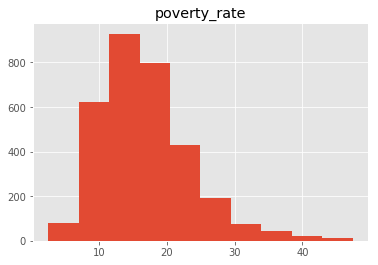

In [41]:
ht_pov = poverty_labels.hist(column='poverty_rate')

In [38]:
poverty = pd.merge(poverty_train, poverty_labels, on='row_id')
poverty.shape

(3198, 35)

From the summary statistics above, should be clear that there are currently three categorical variables:
- area__rucc with 9 values: 
 - 'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area' counties are most frequent with 608 counties.
 - 'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area' counties are most infrequent with 100 counties.
- area__urban_influence	with 12 values: 
 - 'Small-in a metro area with fewer than 1 million residents' counties are most frequent with 692 counties.
 - 'Noncore not adjacent to a metro/micro area and contains a town of 2,500  or more residents' counties are most infrequent with 122.
- econ__economic_typology with 6 values: 
 - 'Non specialized' economic typology counties are most frequent with 1266 counties. 
 - 'Mining-dependent' economic typologpy counties are most infrequent with 254 counties.

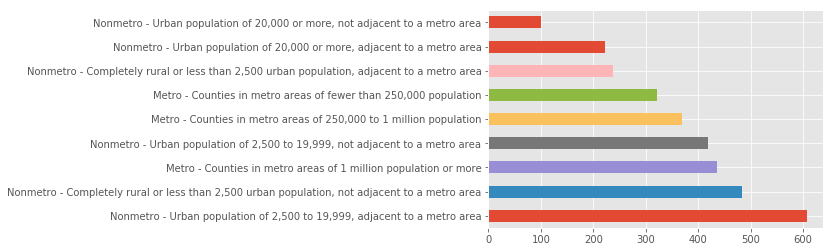

In [128]:
bh_ar = poverty.area__rucc.value_counts().plot.barh()

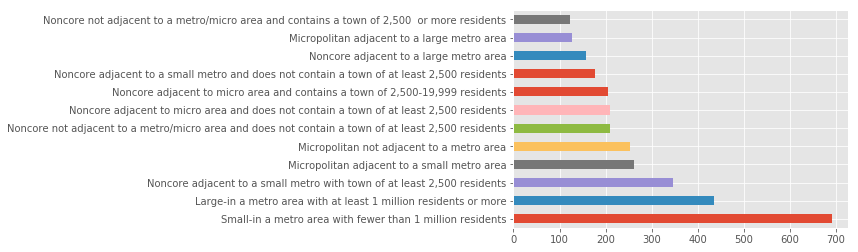

In [129]:
bh_aui = poverty.area__urban_influence.value_counts().plot.barh()

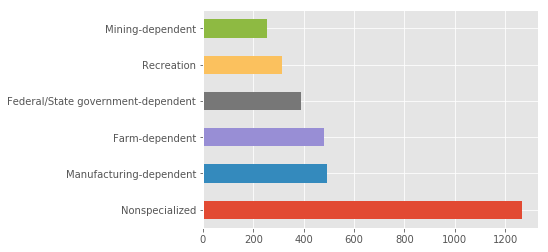

In [130]:
bh_eet = poverty.econ__economic_typology.value_counts().plot.barh()

### Data Exploration and Visualization of Categorical Variables
Here we explore the predictive value of the categorical variables 'econ\_\_economic\_typology', 'area\_\_urban\_influence', 'area\_\_rucc' and 'yr'. We use mostly boxplots and one way analysis of variance (ANOVA).

'Farm-dependent' counties have the lowest poverty rates and 'Federal/State government-dependent' have the highest poverty rates.

In [169]:
meanprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')

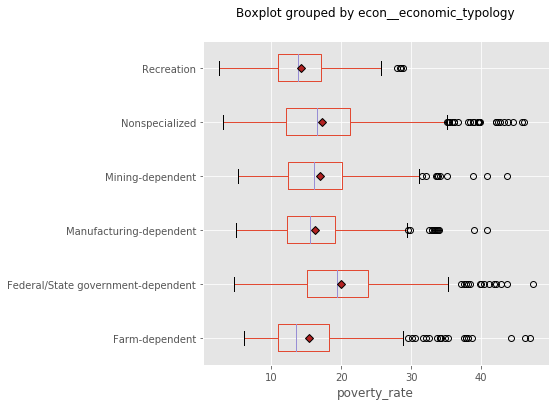

In [170]:
bpd_eet = poverty.boxplot(column='poverty_rate', by='econ__economic_typology', meanprops=meanprops, showmeans=True, vert=False, figsize=(6,6))
tmp = bpd_eet.set_xlabel("poverty_rate")
tmp = bpd_eet.set_title("")

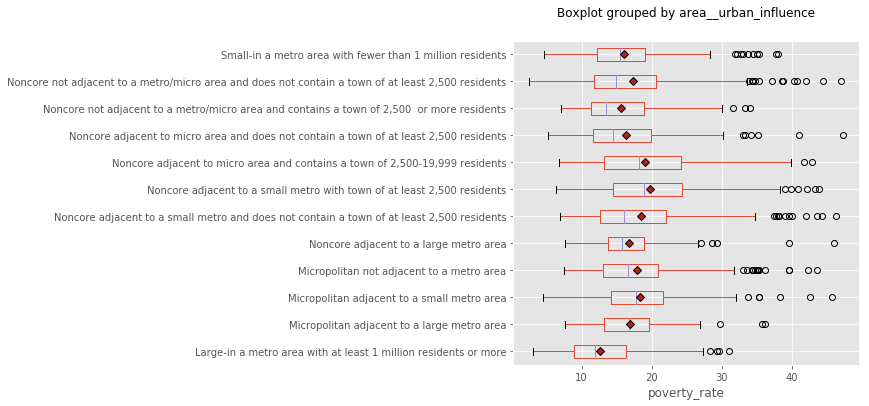

In [171]:
bpd_aui = poverty.boxplot(column='poverty_rate', by='area__urban_influence', meanprops=meanprops, showmeans=True, vert=False, figsize=(6,6))
tmp = bpd_aui.set_xlabel("poverty_rate")
tmp = bpd_aui.set_title("")

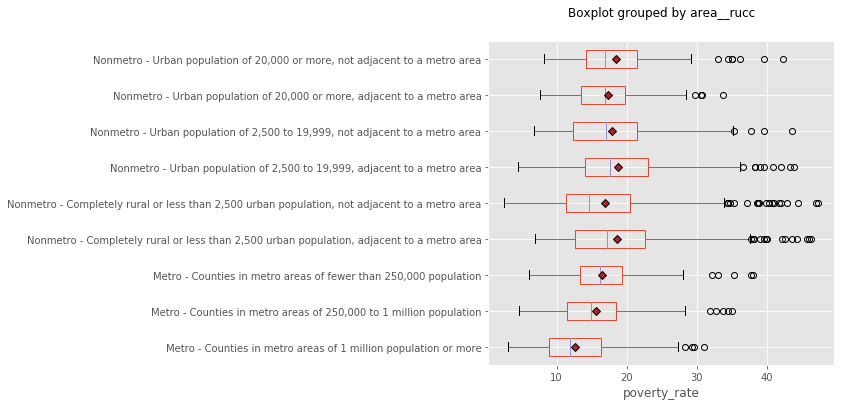

In [172]:
bpd_ar = poverty.boxplot(column='poverty_rate', by='area__rucc', meanprops=meanprops, showmeans=True, vert=False, figsize=(6,6))
tmp = bpd_ar.set_xlabel("poverty_rate")
tmp = bpd_ar.set_title("")

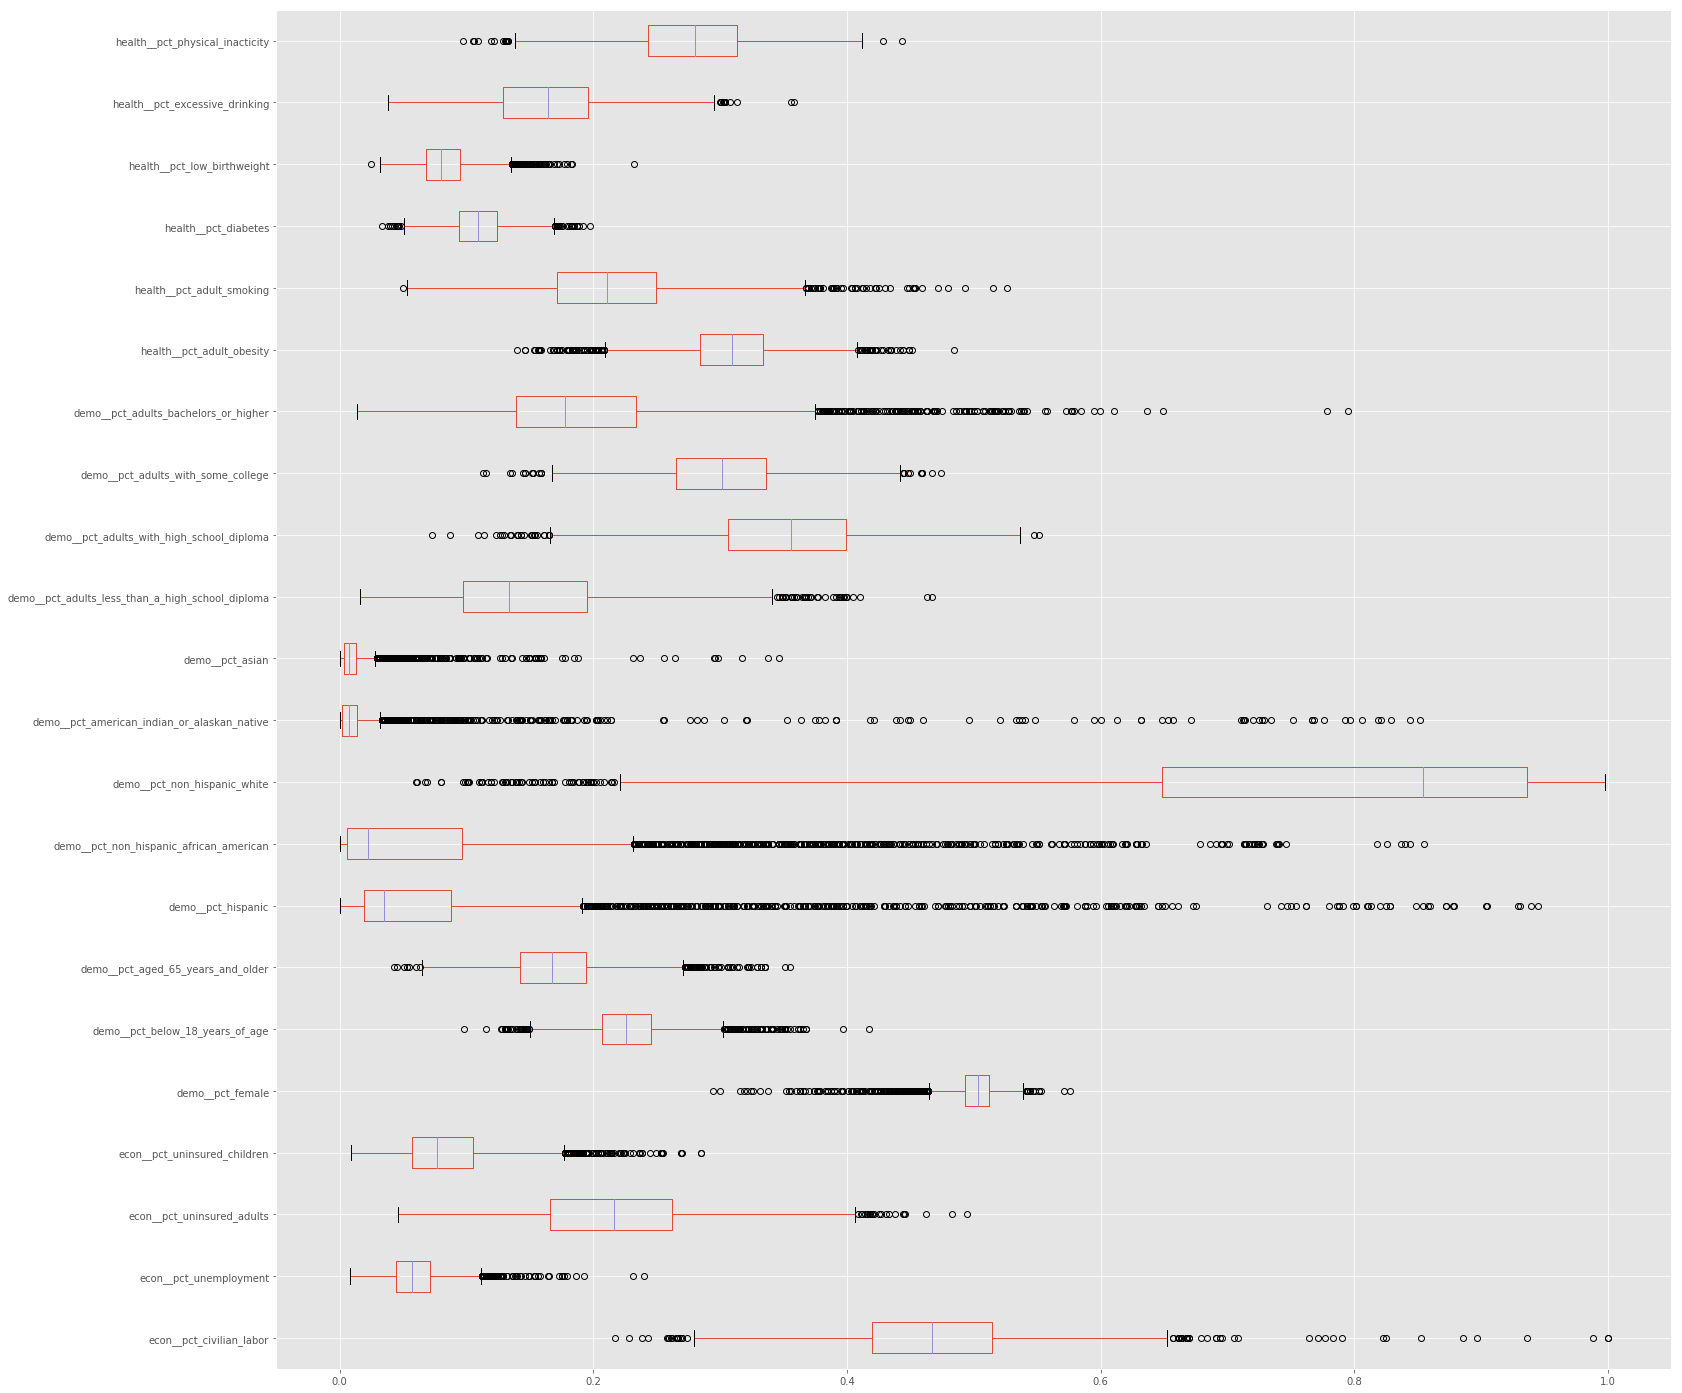

In [61]:
poverty_floats = poverty.loc[:, poverty.dtypes == np.float]
poverty_floats = poverty_floats.drop(columns=['poverty_rate','health__pop_per_primary_care_physician'
                                              , 'health__pop_per_dentist', 'health__motor_vehicle_crash_deaths_per_100k'
                                             , 'health__air_pollution_particulate_matter','demo__death_rate_per_1k'
                                             , 'demo__birth_rate_per_1k', 'health__homicides_per_100k'], axis=1)
bpd_povfl = poverty_floats.boxplot(figsize=(25,25), vert=False)

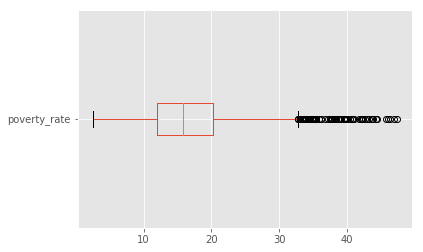

In [62]:
bpd_povr = poverty[['poverty_rate']].boxplot(vert=False)

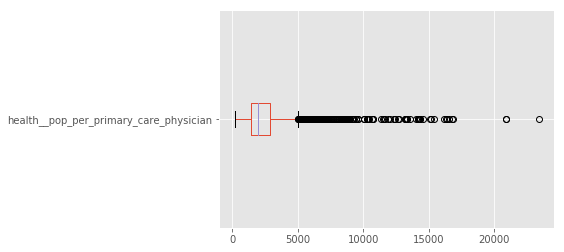

In [63]:
bpd_hpppcp = poverty[['health__pop_per_primary_care_physician']].boxplot(vert=False)

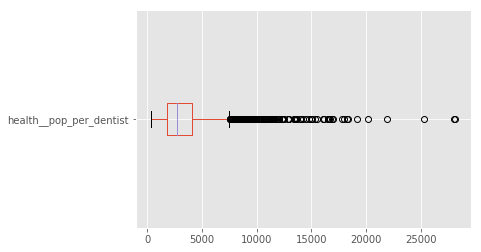

In [64]:
bpd_ppd = poverty[['health__pop_per_dentist']].boxplot(vert=False)

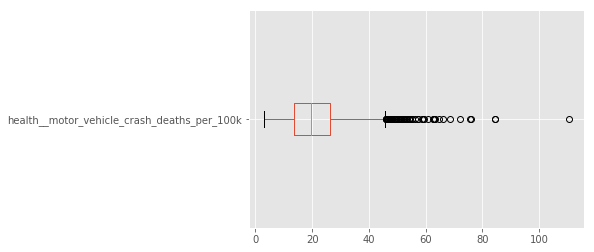

In [65]:
bpd_hmvcdp = poverty[['health__motor_vehicle_crash_deaths_per_100k']].boxplot(vert=False)

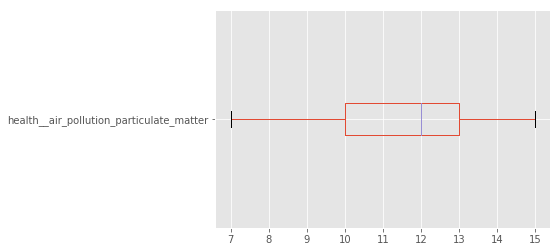

In [66]:
bdp_happm = poverty[['health__air_pollution_particulate_matter']].boxplot(vert=False)

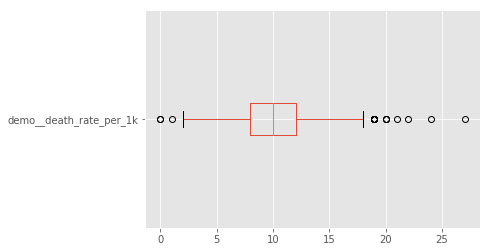

In [67]:
bpd_ddrp = poverty[['demo__death_rate_per_1k']].boxplot(vert=False)

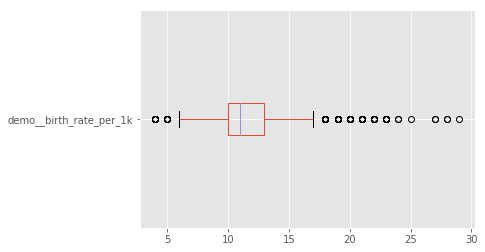

In [68]:
bpd_dbrp = poverty[['demo__birth_rate_per_1k']].boxplot(vert=False)

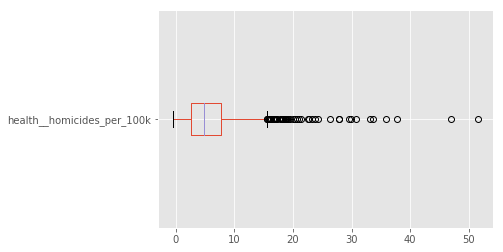

In [69]:
bdp_hhp = poverty[['health__homicides_per_100k']].boxplot(vert=False)

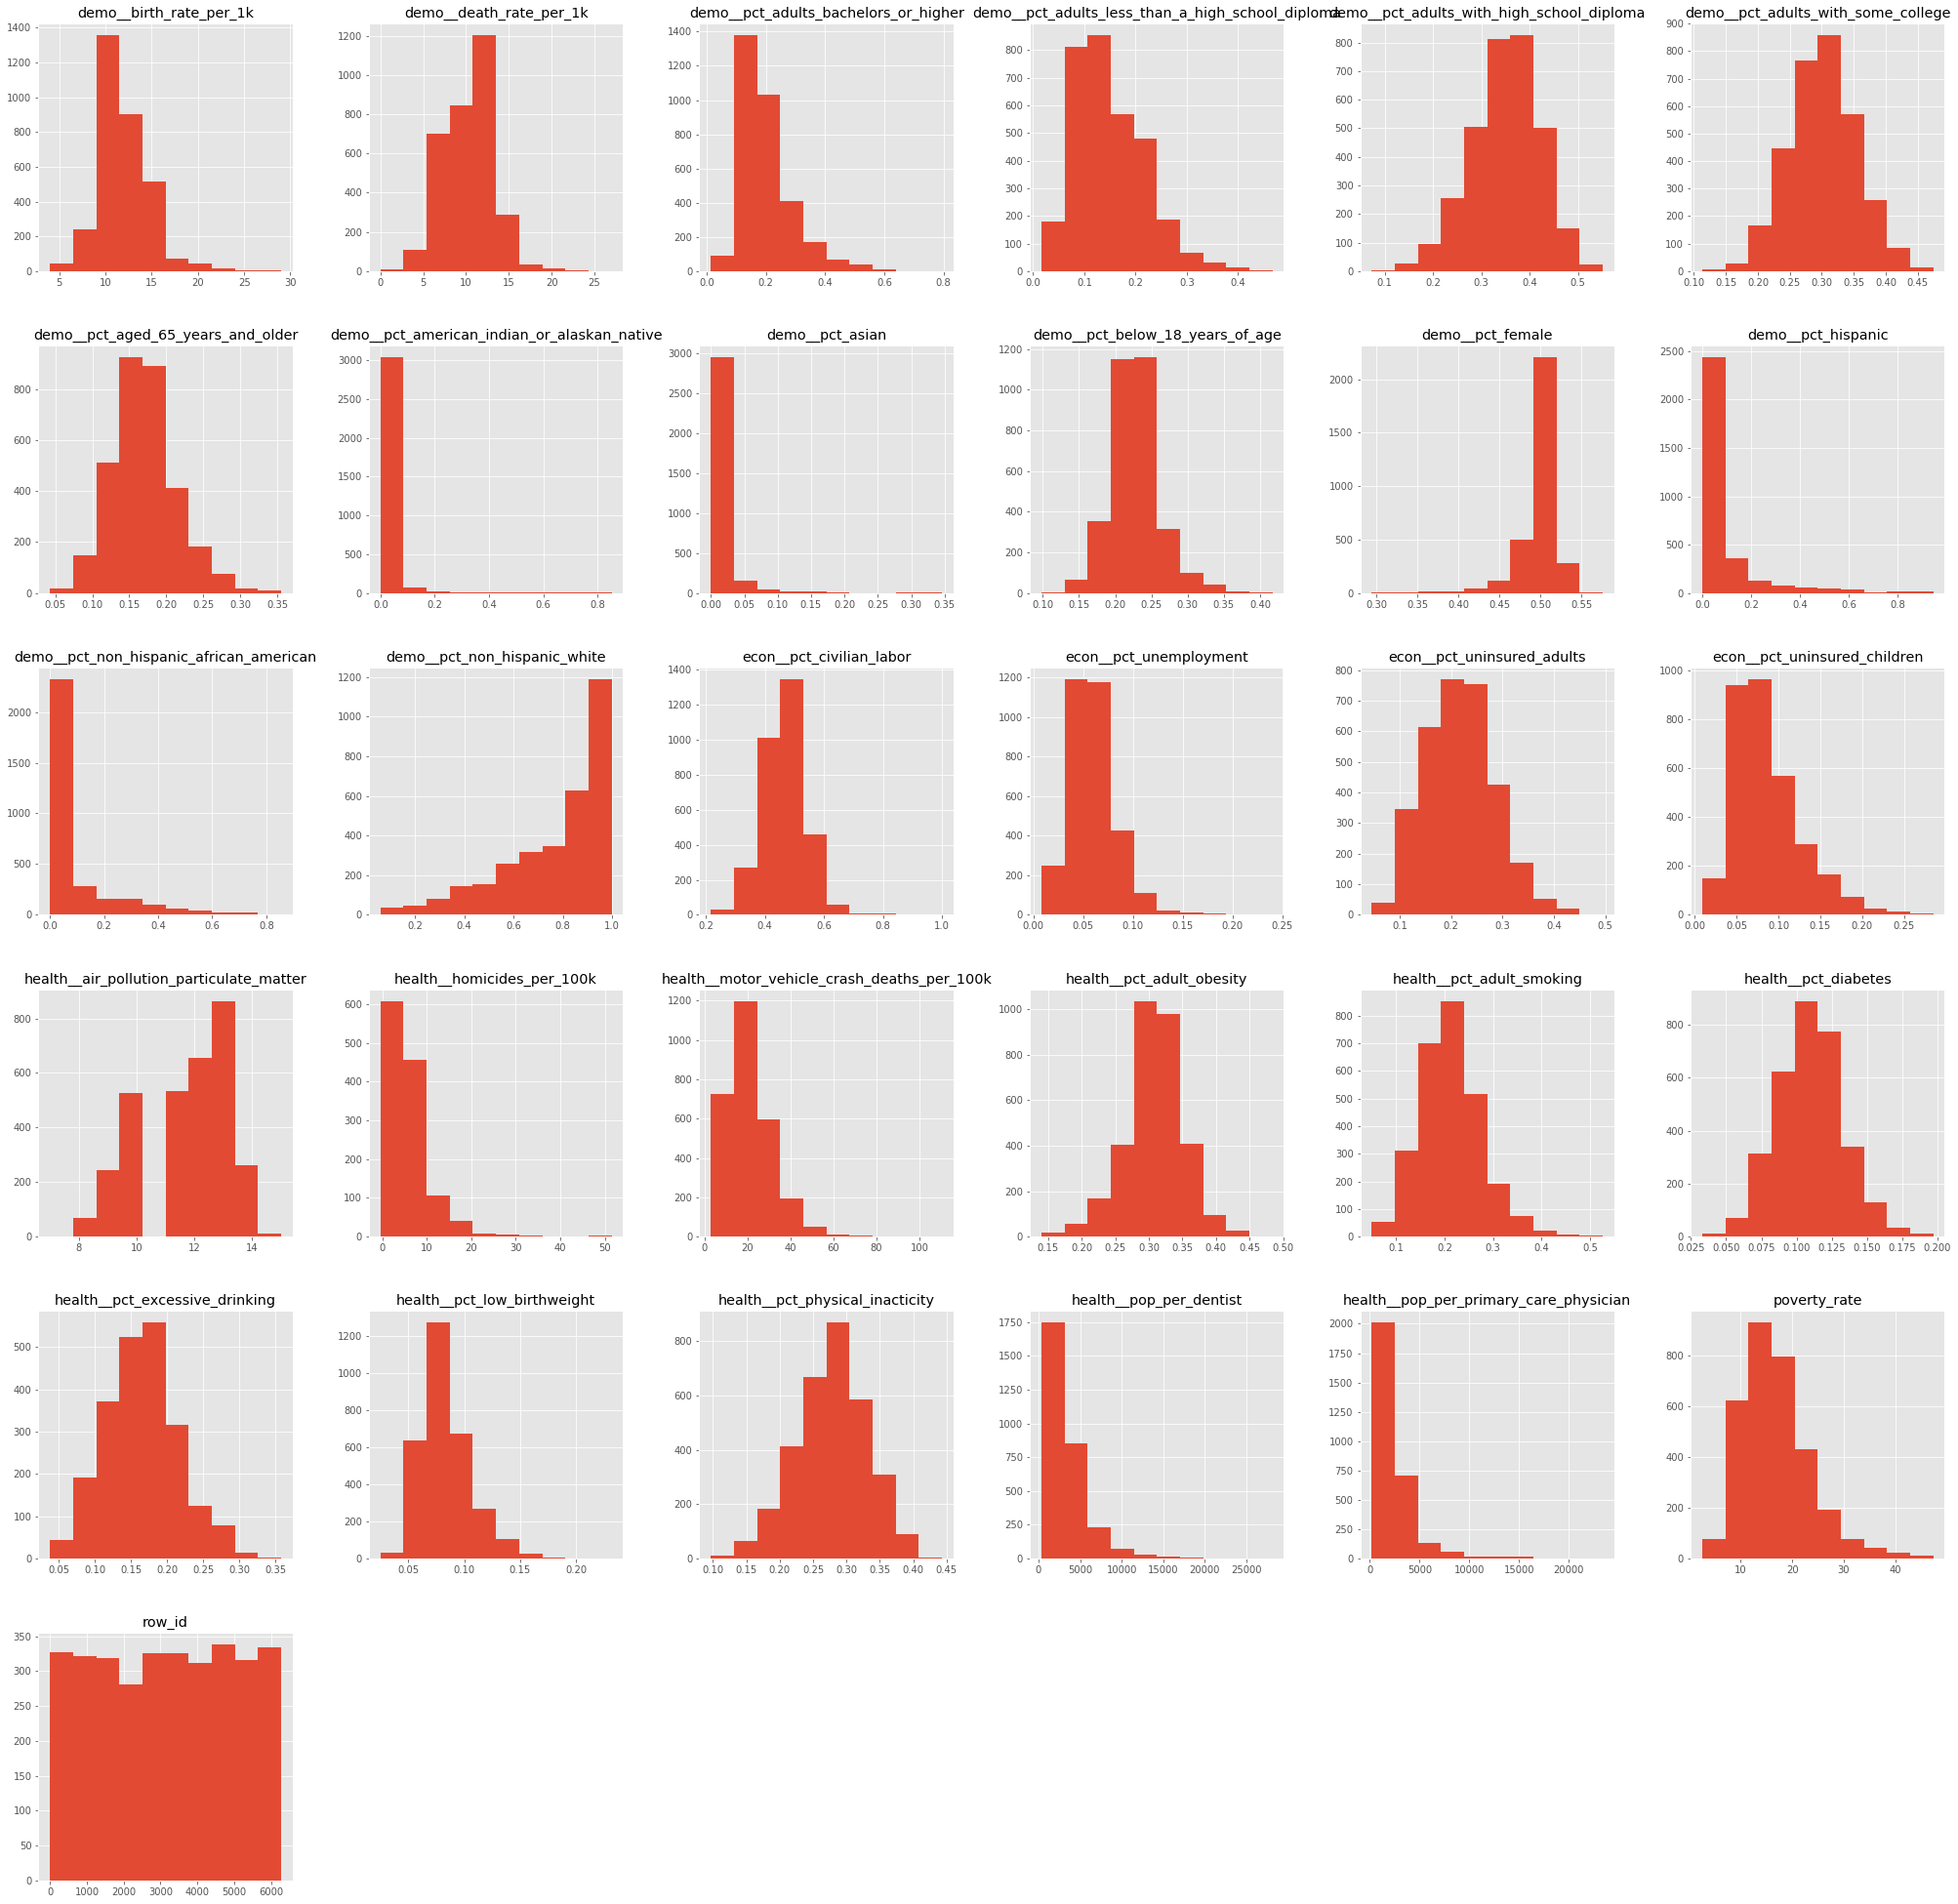

In [70]:
hist_pov = poverty.hist(figsize=(35,35))

We will create features around age and area_rucc.

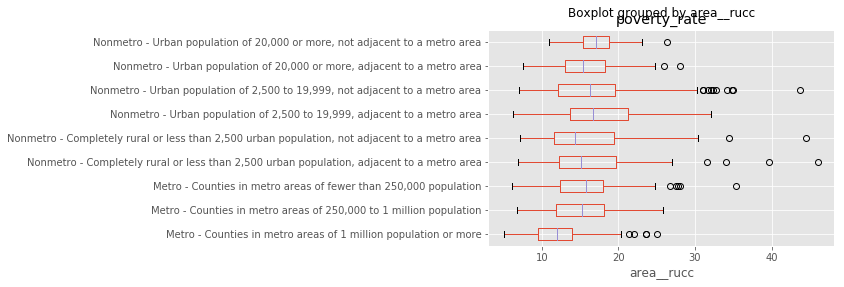

In [71]:
old_counties = poverty.demo__pct_aged_65_years_and_older > 0.167000
old_poor = poverty.loc[old_counties,:]
bpd_old = old_poor.boxplot(column='poverty_rate', by='area__rucc', vert=False, return_type='dict')

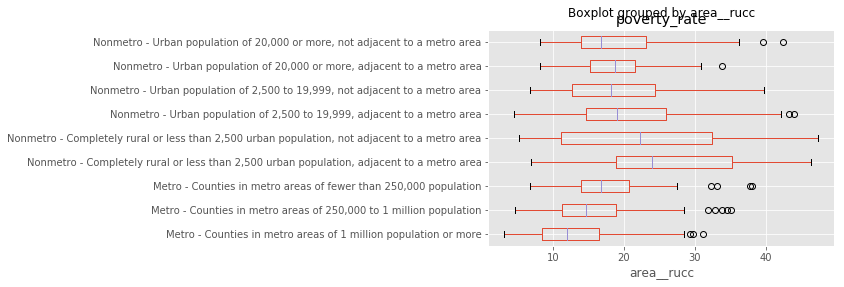

In [72]:
young_counties = poverty.demo__pct_aged_65_years_and_older < 0.167000
young_poor = poverty.loc[young_counties,:]
bpd_young = young_poor.boxplot(column='poverty_rate', by='area__rucc', vert=False, return_type='dict')

The difference in poverty over year 'a' and 'b' is really minimal. Furthermore it doesn't make sense to use this feature to predict poverty, if we want to create a model that generalizes over the years.

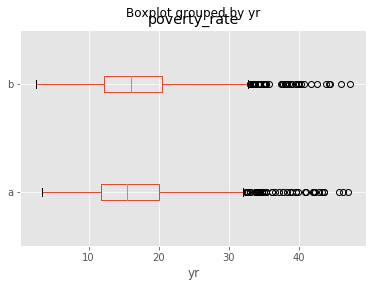

In [73]:
bpd_yr = poverty.boxplot(column='poverty_rate', by='yr', vert=False)

The categorical variable 'yr' does not hold any value to differentiate poverty rates. We will therefore drop it at the cleaning stage.

### Data Exploration and Visualization of Quantitative Variables
We make several scatter plot matrics to visually explore the relationship between the quantitative variables and poverty_rate. Furthermore we look at the correlation matrix, to quantitavely visualize the correlation coefficients.

#### Correlation matrix
Compute the correlation matrix. Identify features with highest positive and negative pearson correlation coefficient. 

The features that correlate most positevely with poverty_rate (> 0.5):
* demo__pct_non_hispanic_african_american             0.507048
* health__pct_diabetes                                0.537038
* econ__pct_uninsured_adults                          0.541712
* health__pct_low_birthweight                         0.565456
* econ__pct_unemployment                              0.592022
* health__homicides_per_100k                          0.621399
* demo__pct_adults_less_than_a_high_school_diploma    0.680360

The features that correlate most negatively with poverty_rate (< - 0.5):
* econ__pct_civilian_labor                           -0.670417

In [ ]:
corr_m = poverty.corr()
corr_m.sort_values(by='poverty_rate').loc[:,'poverty_rate']

In [ ]:
plt_corr = plt.imshow(poverty.corr(), cmap=plt.cm.coolwarm, interpolation='nearest')
plt_corr = plt.colorbar()

#### Scatter plot matrices

In [ ]:
scatter_educ = scatter_matrix(poverty.loc[:, ['demo__pct_adults_less_than_a_high_school_diploma','demo__pct_adults_with_high_school_diploma'
                                              ,'demo__pct_adults_with_some_college','demo__pct_adults_bachelors_or_higher'
                                              ,'poverty_rate']], alpha=0.2, figsize=(27, 27), diagonal='hist')

In [ ]:
scatter_health1 = scatter_matrix(poverty.loc[:, ['health__pct_adult_obesity','health__pct_adult_smoking'
                                              ,'health__pct_diabetes','health__pct_low_birthweight'
                                              ,'health__pct_excessive_drinking','health__pct_physical_inacticity'
                                              ,'poverty_rate']], alpha=0.2, figsize=(27, 27), diagonal='hist')

In [ ]:
scatter_health2 = scatter_matrix(poverty.loc[:, ['health__homicides_per_100k'
                                              ,'health__motor_vehicle_crash_deaths_per_100k','health__pop_per_dentist'
                                              ,'health__pop_per_primary_care_physician'
                                              ,'poverty_rate']], alpha=0.2, figsize=(27, 27), diagonal='hist')

In [ ]:
scatter_econ = scatter_matrix(poverty.loc[:, ['econ__pct_civilian_labor','econ__pct_unemployment'
                                              ,'econ__pct_uninsured_adults','econ__pct_uninsured_children'
                                              ,'poverty_rate']], alpha=0.2, figsize=(27, 27), diagonal='hist')

In [ ]:
scatter_ethnic = scatter_matrix(poverty.loc[:, ['demo__pct_hispanic','demo__pct_non_hispanic_african_american'
                                              ,'demo__pct_non_hispanic_white','demo__pct_american_indian_or_alaskan_native'
                                              ,'demo__pct_asian'
                                              ,'poverty_rate']], alpha=0.2, figsize=(27, 27), diagonal='hist')

These non linear features behave like categorical features.

In [ ]:
scatter_non_ln = scatter_matrix(poverty.loc[:, ['demo__pct_female','demo__death_rate_per_1k'
                                              ,'demo__birth_rate_per_1k'
                                              ,'health__air_pollution_particulate_matter'
                                              ,'poverty_rate']], alpha=0.2, figsize=(27, 27), diagonal='hist')

In [ ]:
# 'demo__pct_female'
scatter_non_ln = scatter_matrix(poverty.loc[:, ['demo__pct_female'
                                              ,'poverty_rate']], alpha=0.2, figsize=(27, 27), diagonal='hist')

Treat non linear features as categorical

### Creation and Visualization of New Categorical Variables

In [ ]:
def create_rucc(input_df):
    input_df.loc[input_df.area__rucc == 'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area','rucc'] = 'NonMetro'
    input_df.loc[input_df.area__rucc == 'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area','rucc'] ='NonMetro'
    input_df.loc[input_df.area__rucc == 'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area','rucc'] = 'NonMetro'
    input_df.loc[input_df.area__rucc == 'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area','rucc'] ='NonMetro'
    input_df.loc[input_df.area__rucc == 'Metro - Counties in metro areas of 1 million population or more','rucc'] = 'Metro'
    input_df.loc[input_df.area__rucc == 'Metro - Counties in metro areas of 250,000 to 1 million population','rucc'] = 'Metro'
    input_df.loc[input_df.area__rucc == 'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area','rucc'] = 'NonMetro'
    input_df.loc[input_df.area__rucc == 'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area','rucc'] = 'NonMetro'
    input_df.loc[input_df.area__rucc == 'Metro - Counties in metro areas of fewer than 250,000 population','rucc'] = 'Metro'
    
    rucc_cats = ['NonMetro','Metro']
    input_df.loc[:,'rucc'] = input_df.rucc.astype('category')
    input_df.loc[:,'rucc'] = input_df.rucc.cat.set_categories(rucc_cats)
    return input_df

In [ ]:
poverty = create_rucc(poverty)
bpd_n_rucc = poverty.boxplot(column='poverty_rate', by='rucc', vert=False)

The categorical variable age does not hold any value by itself.

In [ ]:
def create_young_age_cat(input_df):
    low_pct_youngs = poverty.demo__pct_below_18_years_of_age < 0.175
    medium_pct_youngs = (poverty.demo__pct_below_18_years_of_age >= 0.175) & (poverty.demo__pct_below_18_years_of_age <= 0.3)
    high_pct_youngs = poverty.demo__pct_below_18_years_of_age > 0.3
    input_df.loc[low_pct_youngs,'age_young_cat'] = 'low_youngs'
    input_df.loc[medium_pct_youngs,'age_young_cat'] = 'medium_youngs'
    input_df.loc[high_pct_youngs,'age_young_cat'] = 'high_youngs'

    age_young_cats = ['low_youngs','medium_youngs','high_youngs']
    input_df.loc[:,'age_young_cat'] = input_df.age_young_cat.astype('category')
    input_df.loc[:,'age_young_cat'] = input_df.age_young_cat.cat.set_categories(age_young_cats, ordered=True)
    return input_df

In [ ]:
poverty = create_young_age_cat(poverty)

In [ ]:
def create_young_age_rucc_cat(input_df):
    metro_low_y = (input_df.rucc == 'Metro') & (input_df.age_young_cat == 'low_youngs')
    metro_med_y = (input_df.rucc == 'Metro') & (input_df.age_young_cat == 'medium_youngs')
    metro_hg_y = (input_df.rucc == 'Metro') & (input_df.age_young_cat == 'high_youngs')
    nm_low_y = (input_df.rucc == 'NonMetro') & (input_df.age_young_cat == 'low_youngs')
    nm_med_y = (input_df.rucc == 'NonMetro') & (input_df.age_young_cat == 'medium_youngs')
    nm_hg_y = (input_df.rucc == 'NonMetro') & (input_df.age_young_cat == 'high_youngs')
    
    input_df.loc[metro_low_y,'young_age_rucc_cat'] = 'metro_low_youngs'
    input_df.loc[metro_med_y,'young_age_rucc_cat'] = 'metro_medium_youngs'
    input_df.loc[metro_hg_y,'young_age_rucc_cat'] = 'metro_high_youngs'
    input_df.loc[nm_low_y,'young_age_rucc_cat'] = 'nonmetro_low_youngs'
    input_df.loc[nm_med_y,'young_age_rucc_cat'] = 'nonmetro_medium_youngs'
    input_df.loc[nm_hg_y,'young_age_rucc_cat'] = 'nonmetro_high_youngs'
    
    young_age_rucc_cats = ['metro_low_youngs','metro_medium_youngs','metro_high_youngs'
                          ,'nonmetro_low_youngs','nonmetro_medium_youngs','nonmetro_high_youngs' ]
    input_df.loc[:,'young_age_rucc_cat'] = input_df.young_age_rucc_cat.astype('category')
    input_df.loc[:,'young_age_rucc_cat'] = input_df.young_age_rucc_cat.cat.set_categories(young_age_rucc_cats)
    return input_df

In [ ]:
poverty = create_young_age_rucc_cat(poverty)
bpd_young_age = poverty.boxplot(column='poverty_rate', by=['young_age_rucc_cat'], vert=False)

This feature is redundant and less informative than 'age_olds_cat'. We will therefore not include it.

In [ ]:
def create_old_age_cat(input_df):
    low_pct_olds = poverty.demo__pct_aged_65_years_and_older < 0.167000
    high_pct_olds = poverty.demo__pct_aged_65_years_and_older > 0.167000
    input_df.loc[low_pct_olds,'age_old_cat'] = 'low_olds'
    input_df.loc[high_pct_olds,'age_old_cat'] = 'high_olds'
    
    age_old_cats = ['low_olds','high_olds']
    input_df.loc[:,'age_old_cat'] = input_df.age_old_cat.astype('category')
    input_df.loc[:,'age_old_cat'] = input_df.age_old_cat.cat.set_categories(age_old_cats, ordered=True)
    return input_df

In [ ]:
poverty = create_old_age_cat(poverty)

In [ ]:
def create_old_age_rucc_cat(input_df):
    metro_low_o = (input_df.rucc == 'Metro') & (input_df.age_old_cat == 'low_olds')
    metro_hg_o = (input_df.rucc == 'Metro') & (input_df.age_old_cat == 'high_olds')
    nm_low_o = (input_df.rucc == 'NonMetro') & (input_df.age_old_cat == 'low_olds')
    nm_hg_o = (input_df.rucc == 'NonMetro') & (input_df.age_old_cat == 'high_olds')
    input_df.loc[metro_low_o,'old_age_rucc_cat'] = 'metro_low_olds'
    input_df.loc[metro_hg_o,'old_age_rucc_cat'] = 'metro_high_olds'
    input_df.loc[nm_low_o,'old_age_rucc_cat'] = 'nonmetro_low_olds'
    input_df.loc[nm_hg_o,'old_age_rucc_cat'] = 'nonmetro_high_olds'
    
    old_age_rucc_cats = ['metro_low_olds','metro_high_olds'
                          ,'nonmetro_low_olds','nonmetro_high_olds']
    input_df.loc[:,'old_age_rucc_cat'] = input_df.old_age_rucc_cat.astype('category')
    input_df.loc[:,'old_age_rucc_cat'] = input_df.old_age_rucc_cat.cat.set_categories(old_age_rucc_cats)
    return input_df

In [ ]:
poverty = create_old_age_rucc_cat(poverty)
bpd_old_age = poverty.boxplot(column='poverty_rate', by=['old_age_rucc_cat'], vert=False)

In [ ]:
def create_birthrate_cat(input_df):
    br_0_5 = input_df.demo__birth_rate_per_1k < 5
    br_5_10 = (input_df.demo__birth_rate_per_1k >= 5) & (input_df.demo__birth_rate_per_1k < 10)
    br_10_15 = (input_df.demo__birth_rate_per_1k >= 10) & (input_df.demo__birth_rate_per_1k < 15) 
    br_15_20 = (input_df.demo__birth_rate_per_1k >= 15) & (input_df.demo__birth_rate_per_1k < 20)
    br_20_25 = (input_df.demo__birth_rate_per_1k >= 20) & (input_df.demo__birth_rate_per_1k < 25)
    br_25_30 = (input_df.demo__birth_rate_per_1k >= 25) & (input_df.demo__birth_rate_per_1k < 30)
    br_30_35 = (input_df.demo__birth_rate_per_1k >= 30) & (input_df.demo__birth_rate_per_1k < 35)
    br_35_40 = input_df.demo__birth_rate_per_1k >= 35

    input_df.loc[br_0_5,'birth_rate_cat'] = 'br_0_5'
    input_df.loc[br_5_10,'birth_rate_cat'] = 'br_5_10'
    input_df.loc[br_10_15,'birth_rate_cat'] = 'br_10_15'
    input_df.loc[br_15_20,'birth_rate_cat'] = 'br_15_20'
    input_df.loc[br_20_25,'birth_rate_cat'] = 'br_20_25'
    input_df.loc[br_25_30,'birth_rate_cat'] = 'br_25_30'
    input_df.loc[br_30_35,'birth_rate_cat'] = 'br_30_35'
    input_df.loc[br_35_40,'birth_rate_cat'] = 'br_35_40'
    
    ord_br_cats = ['br_0_5', 'br_5_10', 'br_10_15', 'br_15_20', 'br_20_25', 'br_25_30', 'br_30_35', 'br_35_40']
    input_df.loc[:,'birth_rate_cat'] = input_df.birth_rate_cat.astype('category')
    input_df.loc[:,'birth_rate_cat'] = input_df.birth_rate_cat.cat.set_categories(ord_br_cats, ordered=True)
    return input_df

In [ ]:
poverty = create_birthrate_cat(poverty)
bpd_br = poverty.boxplot(column='poverty_rate', by=['birth_rate_cat'], vert=False)

In [ ]:
def create_deathrate_cat(input_df):
    dr_0_5 = input_df.demo__death_rate_per_1k < 5
    dr_5_10 = (input_df.demo__death_rate_per_1k >= 5) & (input_df.demo__death_rate_per_1k < 10)
    dr_10_15 = (input_df.demo__death_rate_per_1k >= 10) & (input_df.demo__death_rate_per_1k < 15)
    dr_15_20 = (input_df.demo__death_rate_per_1k >= 15) & (input_df.demo__death_rate_per_1k < 20)
    dr_20_25 = (input_df.demo__death_rate_per_1k >= 20) & (input_df.demo__death_rate_per_1k < 25)
    dr_25_30 = (input_df.demo__death_rate_per_1k >= 25) & (input_df.demo__death_rate_per_1k < 30)
    dr_30_35 = (input_df.demo__death_rate_per_1k >= 30) & (input_df.demo__death_rate_per_1k < 35)
    dr_35_40 = input_df.demo__death_rate_per_1k >= 35

    input_df.loc[dr_0_5,'death_rate_cat'] = 'dr_0_5'
    input_df.loc[dr_5_10,'death_rate_cat'] = 'dr_5_10'
    input_df.loc[dr_10_15,'death_rate_cat'] = 'dr_10_15'
    input_df.loc[dr_15_20,'death_rate_cat'] = 'dr_15_20'
    input_df.loc[dr_20_25,'death_rate_cat'] = 'dr_20_25'
    input_df.loc[dr_25_30,'death_rate_cat'] = 'dr_25_30'
    input_df.loc[dr_30_35,'death_rate_cat'] = 'dr_30_35'
    input_df.loc[dr_35_40,'death_rate_cat'] = 'dr_35_40'
    
    ord_dr_cats = ['dr_0_5', 'dr_5_10', 'dr_10_15', 'dr_15_20', 'dr_20_25', 'dr_25_30', 'dr_30_35', 'dr_35_40']
    input_df.loc[:,'death_rate_cat'] = input_df.death_rate_cat.astype('category')
    input_df.loc[:,'death_rate_cat'] = input_df.death_rate_cat.cat.set_categories(ord_dr_cats, ordered=True)
    return input_df

In [ ]:
poverty = create_deathrate_cat(poverty)
bpd_n_ddr = poverty.boxplot(column='poverty_rate', by=['death_rate_cat'], vert=False)

We are going to drop this feature. I see no relevant pattern.

In [ ]:
bpd_n_appm = poverty.boxplot(column='poverty_rate', by=['health__air_pollution_particulate_matter'], vert=False)

In [ ]:
def getWhiskers(input_df):
    median = np.median(input_df)
    upper_quartile = np.percentile(input_df, 75)
    lower_quartile = np.percentile(input_df, 25)
    iqr = upper_quartile - lower_quartile
    upper_whisker = input_df[input_df<=upper_quartile+1.5*iqr].max()
    lower_whisker = input_df[input_df>=lower_quartile-1.5*iqr].min()
    return lower_whisker, upper_whisker

In [ ]:
poverty_ethn = poverty.loc[:,['demo__pct_hispanic']]
bpd_ethn = poverty_ethn.boxplot(figsize=(5,5), vert=False, return_type='dict')

In [ ]:
[item.get_xdata() for item in bpd_ethn['whiskers']]

In [ ]:
def create_hispanic_cat(input_df):
    hispan_0_2 = input_df.demo__pct_hispanic < 0.2
    hispan_2_4 = (input_df.demo__pct_hispanic >= 0.2) & (input_df.demo__pct_hispanic < 0.4)
    hispan_4_6 = (input_df.demo__pct_hispanic >= 0.4) & (input_df.demo__pct_hispanic < 0.6)
    hispan_6_8 = (input_df.demo__pct_hispanic >= 0.6) & (input_df.demo__pct_hispanic < 0.8)
    hispan_8_1 = (input_df.demo__pct_hispanic >= 0.8)
    
    input_df.loc[hispan_0_2,'hispanic_cat'] = 'hispan_0_2'
    input_df.loc[hispan_2_4,'hispanic_cat'] = 'hispan_2_4'
    input_df.loc[hispan_4_6,'hispanic_cat'] = 'hispan_4_6'
    input_df.loc[hispan_6_8,'hispanic_cat'] = 'hispan_6_8'
    input_df.loc[hispan_8_1,'hispanic_cat'] = 'hispan_8_1'
    
    ord_hispan_cats = ['hispan_0_2','hispan_2_4','hispan_4_6','hispan_6_8','hispan_8_1']
    input_df.loc[:,'hispanic_cat'] = input_df.hispanic_cat.astype('category')
    input_df.loc[:,'hispanic_cat'] = input_df.hispanic_cat.cat.set_categories(ord_hispan_cats, ordered=True)
    return input_df

In [ ]:
poverty = create_hispanic_cat(poverty)
bpd_hispan = poverty.boxplot(column='poverty_rate', by=['hispanic_cat'], vert=False)

In [ ]:
poverty_ethn = poverty.loc[:,['demo__pct_non_hispanic_african_american']]
bpd_ethn = poverty_ethn.boxplot(figsize=(5,5), vert=False, return_type='dict')

In [ ]:
[item.get_xdata() for item in bpd_ethn['whiskers']]

In [ ]:
def create_african_cat(input_df):
    african_0_2 = input_df.demo__pct_non_hispanic_african_american < 0.2
    african_2_4 = (input_df.demo__pct_non_hispanic_african_american >= 0.2) & (input_df.demo__pct_non_hispanic_african_american < 0.4)
    african_4_6 = (input_df.demo__pct_non_hispanic_african_american >= 0.4) & (input_df.demo__pct_non_hispanic_african_american < 0.6)
    african_6_8 = (input_df.demo__pct_non_hispanic_african_american >= 0.6) & (input_df.demo__pct_non_hispanic_african_american < 0.8)
    african_8_1 = (input_df.demo__pct_non_hispanic_african_american >= 0.8)
    
    input_df.loc[african_0_2,'african_cat'] = 'african_0_2'
    input_df.loc[african_2_4,'african_cat'] = 'african_2_4'
    input_df.loc[african_4_6,'african_cat'] = 'african_4_6'
    input_df.loc[african_6_8,'african_cat'] = 'african_6_8'
    input_df.loc[african_8_1,'african_cat'] = 'african_8_1'
     
    ord_african_cats = ['african_0_2','african_2_4','african_4_6','african_6_8','african_8_1']
    input_df.loc[:,'african_cat'] = input_df.african_cat.astype('category')
    input_df.loc[:,'african_cat'] = input_df.african_cat.cat.set_categories(ord_african_cats, ordered=True)
    return input_df

In [ ]:
poverty = create_african_cat(poverty)
bpd_african = poverty.boxplot(column='poverty_rate', by=['african_cat'], vert=False)

In [ ]:
poverty_ethn = poverty.loc[:,['demo__pct_non_hispanic_white']]
bpd_ethn = poverty_ethn.boxplot(figsize=(5,5), vert=False, return_type='dict')

In [ ]:
[item.get_xdata() for item in bpd_ethn['whiskers']]

In [ ]:
def create_white_cat(input_df):
    white_0_2 = input_df.demo__pct_non_hispanic_white < 0.2
    white_2_4 = (input_df.demo__pct_non_hispanic_white >= 0.2) & (input_df.demo__pct_non_hispanic_white < 0.4)
    white_4_6 = (input_df.demo__pct_non_hispanic_white >= 0.4) & (input_df.demo__pct_non_hispanic_white < 0.6)
    white_6_8 = (input_df.demo__pct_non_hispanic_white >= 0.6) & (input_df.demo__pct_non_hispanic_white < 0.8)
    white_8_1 = (input_df.demo__pct_non_hispanic_white >= 0.8)
    input_df.loc[white_0_2,'white_cat'] = 'white_0_2'
    input_df.loc[white_2_4,'white_cat'] = 'white_2_4'
    input_df.loc[white_4_6,'white_cat'] = 'white_4_6'
    input_df.loc[white_6_8,'white_cat'] = 'white_6_8'
    input_df.loc[white_8_1,'white_cat'] = 'white_8_1'
    
    ord_white_cats = ['white_0_2','white_2_4','white_4_6','white_6_8','white_8_1']
    input_df.loc[:,'white_cat'] = input_df.white_cat.astype('category')
    input_df.loc[:,'white_cat'] = input_df.white_cat.cat.set_categories(ord_white_cats, ordered=True)
    return input_df

In [ ]:
poverty = create_white_cat(poverty)
bpd_n_ddr = poverty.boxplot(column='poverty_rate', by=['white_cat'], vert=False)

In [ ]:
poverty_ethn = poverty.loc[:,['demo__pct_american_indian_or_alaskan_native']]
bpd_ethn = poverty_ethn.boxplot(figsize=(5,5), vert=False, return_type='dict')

In [ ]:
[item.get_xdata() for item in bpd_ethn['whiskers']]

In [ ]:
def create_native_cat(input_df):
    native_0_2 = input_df.demo__pct_american_indian_or_alaskan_native < 0.2
    native_2_4 = (input_df.demo__pct_american_indian_or_alaskan_native >= 0.2) & (input_df.demo__pct_american_indian_or_alaskan_native < 0.4)
    native_4_6 = (input_df.demo__pct_american_indian_or_alaskan_native >= 0.4) & (input_df.demo__pct_american_indian_or_alaskan_native < 0.6)
    native_6_8 = (input_df.demo__pct_american_indian_or_alaskan_native >= 0.6) & (input_df.demo__pct_american_indian_or_alaskan_native < 0.8)
    native_8_1 = (input_df.demo__pct_american_indian_or_alaskan_native >= 0.8)
    input_df.loc[native_0_2,'native_cat'] = 'native_0_2'
    input_df.loc[native_2_4,'native_cat'] = 'native_2_4'
    input_df.loc[native_4_6,'native_cat'] = 'native_4_6'
    input_df.loc[native_6_8,'native_cat'] = 'native_6_8'
    input_df.loc[native_8_1,'native_cat'] = 'native_8_1'
    
    ord_native_cats = ['native_0_2','native_2_4','native_4_6','native_6_8','native_8_1']
    input_df.loc[:,'native_cat'] = input_df.native_cat.astype('category')
    input_df.loc[:,'native_cat'] = input_df.native_cat.cat.set_categories(ord_native_cats, ordered=True)
    return input_df

In [ ]:
poverty = create_native_cat(poverty)
bpd_n_ddr = poverty.boxplot(column='poverty_rate', by=['native_cat'], vert=False)

In [ ]:
poverty_ethn = poverty.loc[:,['demo__pct_asian']]
bpd_ethn = poverty_ethn.boxplot(figsize=(5,5), vert=False, return_type='dict')

In [ ]:
[item.get_xdata() for item in bpd_ethn['whiskers']]

In [ ]:
def create_asian_cat(input_df):
    asian_0_2 = input_df.demo__pct_asian < 0.2
    asian_2_4 = (input_df.demo__pct_asian >= 0.2) & (input_df.demo__pct_asian < 0.4)
    asian_4_6 = (input_df.demo__pct_asian >= 0.4) & (input_df.demo__pct_asian < 0.6)
    asian_6_8 = (input_df.demo__pct_asian >= 0.6) & (input_df.demo__pct_asian < 0.8)
    asian_8_1 = (input_df.demo__pct_asian >= 0.8)

    input_df.loc[asian_0_2,'asian_cat'] = 'asian_0_2'
    input_df.loc[asian_2_4,'asian_cat'] = 'asian_2_4'
    input_df.loc[asian_4_6,'asian_cat'] = 'asian_4_6'
    input_df.loc[asian_6_8,'asian_cat'] = 'asian_6_8'
    input_df.loc[asian_8_1,'asian_cat'] = 'asian_8_1'
    
    ord_asian_cats = ['asian_0_2','asian_2_4','asian_4_6','asian_6_8','asian_8_1']
    input_df.loc[:,'asian_cat'] = input_df.asian_cat.astype('category')
    input_df.loc[:,'asian_cat'] = input_df.asian_cat.cat.set_categories(ord_asian_cats, ordered=True)
    return input_df

In [ ]:
poverty = create_asian_cat(poverty)
bpd_n_ddr = poverty.boxplot(column='poverty_rate', by=['asian_cat'], vert=False)

In [ ]:
poverty.boxplot(figsize=(20,20), column='poverty_rate', by=['native_cat','white_cat','asian_cat','african_cat','hispanic_cat'], vert=False)

In [ ]:
def create_h_dentist_cat(input_df):
    h_dentist_0_5k = input_df.health__pop_per_dentist < 5000
    h_dentist_5_10k = (input_df.health__pop_per_dentist >= 5000) & (input_df.health__pop_per_dentist < 10000)
    h_dentist_10_15k = (input_df.health__pop_per_dentist >= 10000) & (input_df.health__pop_per_dentist < 15000)
    h_dentist_15_20k = (input_df.health__pop_per_dentist >= 15000) & (input_df.health__pop_per_dentist < 20000)
    h_dentist_20_25k = (input_df.health__pop_per_dentist >= 20000) & (input_df.health__pop_per_dentist < 25000)
    h_dentist_25k = (input_df.health__pop_per_dentist >= 25000)

    input_df.loc[h_dentist_0_5k,'h_dentist_cat'] = 'h_dentist_0_5k'
    input_df.loc[h_dentist_5_10k,'h_dentist_cat'] = 'h_dentist_5_10k'
    input_df.loc[h_dentist_10_15k,'h_dentist_cat'] = 'h_dentist_10_15k'
    input_df.loc[h_dentist_15_20k,'h_dentist_cat'] = 'h_dentist_15_20k'
    input_df.loc[h_dentist_20_25k,'h_dentist_cat'] = 'h_dentist_20_25k'
    input_df.loc[h_dentist_25k,'h_dentist_cat'] = 'h_dentist_25k'
    
    ord_h_dentist_cats = ['h_dentist_0_5k','h_dentist_5_10k','h_dentist_10_15k','h_dentist_15_20k'
                      ,'h_dentist_20_25k','h_dentist_25k']
    input_df.loc[:,'h_dentist_cat'] = input_df.h_dentist_cat.astype('category')
    input_df.loc[:,'h_dentist_cat'] = input_df.h_dentist_cat.cat.set_categories(ord_h_dentist_cats, ordered=True)
    return input_df

In [ ]:
poverty = create_h_dentist_cat(poverty)
bpd_n_ddr = poverty.boxplot(column='poverty_rate', by=['h_dentist_cat'], vert=False)

In [ ]:
def create_h_physician_cat(input_df):
    h_physician_cat_0_5k = input_df.health__pop_per_primary_care_physician < 5000
    h_physician_cat_5_10k = (input_df.health__pop_per_primary_care_physician >= 5000) & (input_df.health__pop_per_primary_care_physician < 10000)
    h_physician_cat_10_15k = (input_df.health__pop_per_primary_care_physician >= 10000) & (input_df.health__pop_per_primary_care_physician < 15000)
    h_physician_cat_15_20k = (input_df.health__pop_per_primary_care_physician >= 15000) & (input_df.health__pop_per_primary_care_physician < 20000)
    h_physician_cat_20_25k = (input_df.health__pop_per_primary_care_physician >= 20000) & (input_df.health__pop_per_primary_care_physician < 25000)
    h_physician_cat_25k = (input_df.health__pop_per_primary_care_physician >= 25000)

    input_df.loc[h_physician_cat_0_5k,'h_physician_cat'] = 'h_physician_cat_0_5k'
    input_df.loc[h_physician_cat_5_10k,'h_physician_cat'] = 'h_physician_cat_5_10k'
    input_df.loc[h_physician_cat_10_15k,'h_physician_cat'] = 'h_physician_cat_10_15k'
    input_df.loc[h_physician_cat_15_20k,'h_physician_cat'] = 'h_physician_cat_15_20k'
    input_df.loc[h_physician_cat_20_25k,'h_physician_cat'] = 'h_physician_cat_20_25k'
    input_df.loc[h_physician_cat_25k,'h_physician_cat'] = 'h_physician_cat_25k'
    
    ord_h_physician_cats = ['h_physician_cat_0_5k','h_physician_cat_5_10k','h_physician_cat_10_15k','h_physician_cat_15_20k'
                      ,'h_physician_cat_20_25k','h_physician_cat_25k']
    input_df.loc[:,'h_physician_cat'] = input_df.h_physician_cat.astype('category')
    input_df.loc[:,'h_physician_cat'] = input_df.h_physician_cat.cat.set_categories(ord_h_physician_cats, ordered=True)
    return input_df

In [ ]:
poverty = create_h_physician_cat(poverty)
bpd_n_ddr = poverty.boxplot(column='poverty_rate', by=['h_physician_cat'], vert=False)

In [ ]:
def create_air_poll_cat(input_df):
    ap_0_5 = input_df.health__air_pollution_particulate_matter < 5
    ap_5_10 = (input_df.health__air_pollution_particulate_matter >= 5) & (input_df.health__air_pollution_particulate_matter < 10)
    ap_10_15 = (input_df.health__air_pollution_particulate_matter >= 10) & (input_df.health__air_pollution_particulate_matter < 15) 
    ap_15_20 = (input_df.health__air_pollution_particulate_matter >= 15) & (input_df.health__air_pollution_particulate_matter < 20)
    ap_20_25 = (input_df.health__air_pollution_particulate_matter >= 20) & (input_df.health__air_pollution_particulate_matter < 25)
    ap_25 = (input_df.health__air_pollution_particulate_matter >= 25)

    input_df.loc[ap_0_5,'air_poll_cat'] = 'ap_0_5'
    input_df.loc[ap_5_10,'air_poll_cat'] = 'ap_5_10'
    input_df.loc[ap_10_15,'air_poll_cat'] = 'ap_10_15'
    input_df.loc[ap_15_20,'air_poll_cat'] = 'ap_15_20'
    input_df.loc[ap_20_25,'air_poll_cat'] = 'ap_20_25'
    input_df.loc[ap_25,'air_poll_cat'] = 'ap_25'
    
    air_poll_cats = ['ap_0_5', 'ap_5_10', 'ap_10_15', 'ap_15_20', 'ap_20_25', 'ap_25']
    input_df.loc[:,'air_poll_cat'] = input_df.air_poll_cat.astype('category')
    input_df.loc[:,'air_poll_cat'] = input_df.air_poll_cat.cat.set_categories(air_poll_cats, ordered=True)
    return input_df

In [ ]:
poverty = create_air_poll_cat(poverty)
bpd_n_airpoll = poverty.boxplot(column='poverty_rate', by=['air_poll_cat'], vert=False)

In [ ]:
def create_child_cat(input_df):
    child_0_2 = input_df.econ__pct_uninsured_children < 0.2
    child_2_4 = (input_df.econ__pct_uninsured_children >= 0.2) & (input_df.econ__pct_uninsured_children < 0.4)
    child_4_6 = (input_df.econ__pct_uninsured_children >= 0.4) & (input_df.econ__pct_uninsured_children < 0.6)
    child_6_8 = (input_df.econ__pct_uninsured_children >= 0.6) & (input_df.econ__pct_uninsured_children < 0.8)
    child_8_1 = (input_df.econ__pct_uninsured_children >= 0.8)

    input_df.loc[child_0_2,'child_cat'] = 'child_0_2'
    input_df.loc[child_2_4,'child_cat'] = 'child_2_4'
    input_df.loc[child_4_6,'child_cat'] = 'child_4_6'
    input_df.loc[child_6_8,'child_cat'] = 'child_6_8'
    input_df.loc[child_8_1,'child_cat'] = 'child_8_1'
    
    ord_child_cats = ['child_0_2','child_2_4','child_4_6','child_6_8','child_8_1']
    input_df.loc[:,'child_cat'] = input_df.child_cat.astype('category')
    input_df.loc[:,'child_cat'] = input_df.child_cat.cat.set_categories(ord_child_cats, ordered=True)
    return input_df

In [ ]:
poverty = create_child_cat(poverty)
bpd_n_airpoll = poverty.boxplot(column='poverty_rate', by=['child_cat'], vert=False)

### TODO Outliers Analysis!

Lets try to fix at least these outliers

In [ ]:
bpd_n_rucc = poverty.boxplot(column='poverty_rate', by='rucc', vert=False)

## Cleaning the Data
In this phase or stage we clean the data:
* drop features with low prediction value
* replace missing values
* scale features???

### Drop columns
We will start by dropping the columns or features with low prediction value. The features 'area__rucc', 'age_cat', 'area__urban_influence', 'econ__economic_typology' and 'rucc' are redundant with the new features 'age_rucc', 'aui' and 'eet' we created. The feature 'yr' does not hold value to predict poverty_rate???????.

In [ ]:
# econ__pct_uninsured_children                        0.098882

def drop_features(input_df):
    result_df = input_df.drop(columns=['yr','area__rucc','rucc', 'demo__pct_below_18_years_of_age'
                                      ,'demo__pct_aged_65_years_and_older'
                                      ,'h_physician_cat'
                                      ,'health__air_pollution_particulate_matter','air_poll_cat'
                                      ,'demo__pct_asian', 'demo__pct_american_indian_or_alaskan_native'
                                      ,'demo__pct_non_hispanic_african_american'
                                      ,'demo__pct_non_hispanic_white', 'demo__pct_hispanic'
                                      ,'demo__death_rate_per_1k', 'demo__birth_rate_per_1k'
                                      ,'demo__pct_female','health__pop_per_primary_care_physician'
                                      ,'health__pop_per_dentist','age_young_cat','age_old_cat'
                                      ,'econ__pct_uninsured_children','child_cat'
                                      ,], axis=1)
    return result_df

In [ ]:
poverty_clean = drop_features(poverty)

### Convert feature to right type

In [ ]:
def convert_to_cat(input_df):
    input_df.loc[:,'area__urban_influence'] = input_df.area__urban_influence.astype("category")
    input_df.loc[:,'econ__economic_typology'] = input_df.econ__economic_typology.astype("category")
    return input_df

In [ ]:
poverty_clean = convert_to_cat(poverty_clean)

In [ ]:
poverty_clean.dtypes

### Apply SQRT Transformation

In [ ]:
def apply_log10(input_df):
    float_df = input_df.loc[:, input_df.dtypes == np.float]
    float_df = float_df.replace(0,1)
    input_df.loc[:, input_df.dtypes == np.float] = np.log10(float_df)
    return input_df

def apply_pov_rate_sqrt(input_df):
    input_df.loc[:, 'poverty_rate'] = np.sqrt(input_df.loc[:, 'poverty_rate'])
    return input_df

### Replace Missing Values
The missing values are replaced by the respective median value of the feature or variable.

In [ ]:
def clean_nans(input_df):
    result_df = input_df.fillna(poverty_clean.mean())
    return result_df

In [ ]:
poverty_clean = clean_nans(poverty_clean)
poverty_clean.shape

As we can see here under there are no missing values.

In [ ]:
poverty_clean.isnull().sum()

### TODO Scale Features!!!
Most of the quantitative features are already scaled between 0 and 1. However the following features are not:
* **demo__birth_rate_per_1k** (behave like categorical variables)
* **demo__death_rate_per_1k** (behave like categorical variables)
* **health__air_pollution_particulate_matter** (behave like categorical variables)
* health__homicides_per_100k
* health__motor_vehicle_crash_deaths_per_100k
* health__pop_per_dentist
* health__pop_per_primary_care_physician

This is why we apply the MinMaxScaler

In [ ]:
def scale_features(input_df):
    input_scale = input_df.loc[:,['health__homicides_per_100k'
                                    ,'health__motor_vehicle_crash_deaths_per_100k']]
    
    input_scaled = pd.DataFrame(MinMaxScaler().fit_transform(input_scale), columns=input_scale.columns)
    
    input_df.loc[:,'health__homicides_per_100k'] = input_scaled.loc[:,'health__homicides_per_100k']
    input_df.loc[:,'health__motor_vehicle_crash_deaths_per_100k'] = input_scaled.loc[:,'health__motor_vehicle_crash_deaths_per_100k']
    return input_df

In [ ]:
poverty_clean = scale_features(poverty_clean)
poverty_clean.describe()

### One Hot Encoding of Categorical Variables

In [ ]:
def cat_to_dummies(input_df):
    result_df = pd.get_dummies(input_df, dummy_na=True, columns=['area__urban_influence','econ__economic_typology'
                                                                 ,'young_age_rucc_cat','old_age_rucc_cat'
                                                                ,'birth_rate_cat','death_rate_cat'
                                                                ,'hispanic_cat','african_cat'
                                                                ,'white_cat','native_cat'
                                                                ,'asian_cat'
                                                                ,'h_dentist_cat'])
    return result_df

In [ ]:
poverty_clean = cat_to_dummies(poverty_clean)
poverty_clean.head()

In [ ]:
poverty_clean.dtypes

In [ ]:
poverty_clean.shape

## Model Building

In [ ]:
rng = np.random.RandomState(0)

In [ ]:
poverty_X = poverty_clean.drop(columns=['row_id','poverty_rate'], axis=1)
poverty_y = poverty_clean.poverty_rate

In [ ]:
# use r2 adjusted in the future
scoring = {'r2':'r2','mse': make_scorer(mean_squared_error, greater_is_better=False)}

In [ ]:
inner_cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=rng)
outer_cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=rng)
inner_clf_cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=rng)
outer_clf_cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=rng)

### Clustering

In [ ]:
# kmeans = KMeans(n_clusters=4, n_init=3, max_iter=300, init='random', random_state=rng, n_jobs=-1)
# kmeans.fit(poverty_clean.drop(columns=['row_id'], axis=1))
# labels = pd.DataFrame(kmeans.predict(poverty_clean.drop(columns=['row_id'], axis=1)), columns=['clusters'])
# labels.head()

In [ ]:
# poverty_X = poverty_clean.copy()

# poverty_X.loc[labels.clusters == 0, 'clusters'] = 0
# poverty_X.loc[labels.clusters == 1, 'clusters'] = 1
# poverty_X.loc[labels.clusters == 2, 'clusters'] = 2
# poverty_X.loc[labels.clusters == 3, 'clusters'] = 3

# cluster_cats = [0, 1, 2, 3]
# poverty_X.loc[:,'clusters'] = cl_pov_X.clusters.astype('category')
# poverty_X.loc[:,'clusters'] = cl_pov_X.clusters.cat.set_categories(cluster_cats)
# poverty_X.shape

In [ ]:
# bpd_clusters = poverty_X.boxplot(column='poverty_rate', by=['clusters'], vert=False)
# poverty_X = poverty_X.drop(columns=['row_id','poverty_rate'], axis=1)

In [ ]:
# andrews_curves(poverty_X, 'clusters', samples=100)

In [ ]:
# parallel_coordinates(poverty_X.loc[:,['econ__pct_unemployment','health__pct_diabetes'
#                                       ,'area__urban_influence'
#                                       ,'clusters']], 'clusters')

### Create Classifier

In [ ]:
# adaClf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=23, splitter='random', criterion='entropy'
#                                                 , min_samples_split=0.015, min_samples_leaf=0.005
#                                                  , min_impurity_decrease=0.2, random_state=rng)
#                            , n_estimators=500, learning_rate=1, random_state=rng)

# adaClf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=13, splitter='random', criterion='entropy'
#                                                  , random_state=rng)
#                            , n_estimators=500, learning_rate=1, random_state=rng)

# adaClf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=7, splitter='random', criterion='entropy'
#                                                  , random_state=rng)
#                            , n_estimators=500, learning_rate=1, random_state=rng)

In [ ]:
# clf_cachedir = mkdtemp()
# clf_estimators = [('clf', adaClf)]
# clf_pipe = Pipeline(clf_estimators, memory=clf_cachedir)
# clf_param_grid = dict(clf=[adaClf])

In [ ]:
# clf_grid = GridSearchCV(estimator=clf_pipe, param_grid=clf_param_grid, scoring='accuracy', cv=inner_clf_cv
#                         , error_score=0, refit='accuracy')
# clf_pred = clf_grid.fit(poverty_X.drop(columns=['clusters'], axis=1), poverty_X.loc[:,'clusters'])
# clf_pred.best_estimator_

In [ ]:
# train_scores = cross_validate(clf_grid, poverty_X.drop(columns=['clusters'], axis=1), poverty_X.loc[:,'clusters'], cv=outer_clf_cv, scoring='accuracy', return_train_score=True)
# train_scores

'test_score': array([ 0.5725429 ,  0.56474259,  0.5921875 ,  0.61032864,  0.60910518]),

### Plain Least Square Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg_grid = GridSearchCV(estimator=lin_reg, param_grid={}, scoring=scoring, cv=inner_cv
                        , error_score=0, refit='mse')
lin_reg_grid.fit(poverty_X, poverty_y)

In [ ]:
train_scores = cross_validate(lin_reg_grid, poverty_X, poverty_y, cv=outer_cv, scoring=scoring, return_train_score=True)
pprint(np.abs(train_scores['test_r2']))
pprint(np.sqrt(np.abs(train_scores['test_mse'])))

### Feature Selection with Least Square Linear Regression

In [ ]:
caching = mkdtemp()

mse = make_scorer(mean_squared_error, greater_is_better=False)

rfecv = RFECV(estimator=LinearRegression(), step=1, cv=inner_cv, scoring=mse)

rfecv.fit(poverty_X, poverty_y)

print("Optimal number of features : %d" % rfecv.n_features_)

In [ ]:
train_scores = cross_validate(rfecv, poverty_X, poverty_y, cv=outer_cv, scoring=scoring, return_train_score=True)
pprint(np.average(np.abs(train_scores['test_r2'])))
pprint(np.average(np.sqrt(np.abs(train_scores['test_mse']))))

In [ ]:
[ranking for ranking in zip(rfecv.ranking_, poverty_X.columns)]

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), np.sqrt(np.abs(rfecv.grid_scores_)))
plt.show()

### AdaBoostRegressor

In [ ]:
cachedir = mkdtemp()
estimators = [('reg_model', LinearRegression())]
regr_pipe = Pipeline(estimators, memory=cachedir)

In [ ]:
# adaReg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=25, splitter='random', criterion='mse'
#                                                 , min_samples_split=0.015, min_samples_leaf=0.005
#                                                  , min_impurity_decrease=0.2)
#                            , n_estimators=600, loss='exponential', learning_rate=0.75, random_state=rng)

# adaReg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=17, splitter='random', criterion='mse'
#                                                 , min_samples_split=0.025, min_samples_leaf=0.01
#                                                  , min_impurity_decrease=0.2, random_state=rng)
#                            , n_estimators=600, loss='linear', learning_rate=0.75, random_state=rng)

# adaReg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=13, splitter='random', criterion='mse'
#                                                 , random_state=rng)
#                            , n_estimators=600, loss='linear', learning_rate=1, random_state=rng)

# adaReg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=7-11-13, splitter='random', criterion='mse'
#                                                 , random_state=rng)
#                            , n_estimators=600, loss='linear', learning_rate=1, random_state=rng)

adaReg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=13, splitter='random', criterion='mse'
                                                , random_state=rng)
                           , n_estimators=600, loss='linear', learning_rate=1, random_state=rng)

# XGBoost proberen

In [ ]:
param_grid = dict(reg_model=[LinearRegression(), adaReg])

In [ ]:
reg_grid = GridSearchCV(estimator=regr_pipe, param_grid=param_grid, scoring=scoring, cv=inner_cv
                        , error_score=0, refit='mse')
reg_pred = reg_grid.fit(poverty_X, poverty_y)
reg_pred.best_estimator_

In [ ]:
train_scores = cross_validate(reg_grid, poverty_X, poverty_y, cv=outer_cv, scoring=scoring, return_train_score=True)
pprint(np.average(np.abs(train_scores['test_r2'])))
pprint(np.average(np.sqrt(np.abs(train_scores['test_mse']))))

score1: 0.84164774625729666 and 2.632247532440791

### Feature Selection

In [ ]:
mse = make_scorer(mean_squared_error, greater_is_better=False)

rfecv = RFECV(estimator=adaReg, step=1, cv=inner_cv, scoring=mse)

rfecv.fit(poverty_X, poverty_y)

print("Optimal number of features : %d" % rfecv.n_features_)

In [ ]:
train_scores = cross_validate(rfecv, poverty_X, poverty_y, cv=outer_cv, scoring=scoring, return_train_score=True)
pprint(np.average(np.abs(train_scores['test_r2'])))
pprint(np.average(np.sqrt(np.abs(train_scores['test_mse']))))

score1: 

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), np.sqrt(np.abs(rfecv.grid_scores_)))
plt.show()

## TODO Analyze Residuals!!!

In [ ]:
plt.scatter(reg_grid.predict(poverty_X), reg_grid.predict(poverty_X) - poverty_y, c='b', s=40, alpha=0.5)

In [ ]:
residuals = reg_grid.predict(poverty_X) - poverty_y
residuals = residuals.rename('residuals')
residuals.hist()

In [ ]:
poverty_X_residuals = pd.concat([poverty_X, poverty.area__urban_influence, poverty.econ__economic_typology, poverty.area__rucc, poverty_y, residuals], axis=1)
poverty_X_high_res = poverty_X_residuals[(poverty_X_residuals.residuals > 7) | (poverty_X_residuals.residuals < -7)]
poverty_X_high_res.describe()

In [ ]:
poverty_X_high_res.head()

In [ ]:
poverty_X_high_res.boxplot(column='residuals', by='area__urban_influence', vert=False)

In [ ]:
poverty_X_high_res.boxplot(column='residuals', by='econ__economic_typology', vert=False)

In [ ]:
poverty_X_high_res.boxplot(column='residuals', by='area__rucc', vert=False)

In [ ]:
scatter_high_res_pos = scatter_matrix(poverty_X_high_res.loc[:, ['demo__pct_adults_less_than_a_high_school_diploma','health__homicides_per_100k'
                                              ,'econ__pct_unemployment','health__pct_low_birthweight'
                                              ,'econ__pct_uninsured_adults', 'health__pct_diabetes'
                                              , 'demo__pct_non_hispanic_african_american'
                                              ,'poverty_rate']], alpha=0.2, figsize=(27, 27), diagonal='hist')

In [ ]:
scatter_high_res__neg = scatter_matrix(poverty_X_high_res.loc[:, ['econ__pct_civilian_labor','demo__pct_non_hispanic_white'
                                              ,'demo__pct_adults_bachelors_or_higher','demo__pct_adults_with_some_college'
                                              ,'health__pct_excessive_drinking'
                                              ,'poverty_rate']], alpha=0.2, figsize=(27, 27), diagonal='hist')

## Evaluation

In [ ]:
poverty_test = pd.read_csv('./Microsoft_-_DAT102x_Predicting_Poverty_in_the_United_States_-_Test_values.csv')

In [ ]:
poverty_test.shape

In [ ]:
#Create Features
poverty_test = create_rucc(poverty_test)
poverty_test = create_young_age_cat(poverty_test)
poverty_test = create_young_age_rucc_cat(poverty_test)
poverty_test = create_old_age_cat(poverty_test)
poverty_test = create_old_age_rucc_cat(poverty_test)
poverty_test = create_birthrate_cat(poverty_test)
poverty_test = create_deathrate_cat(poverty_test)
poverty_test = create_asian_cat(poverty_test)
poverty_test = create_african_cat(poverty_test)
poverty_test = create_white_cat(poverty_test)
poverty_test = create_native_cat(poverty_test)
poverty_test = create_hispanic_cat(poverty_test)
poverty_test = create_h_dentist_cat(poverty_test)
poverty_test = create_h_physician_cat(poverty_test)
poverty_test = create_air_poll_cat(poverty_test)
poverty_test = create_child_cat(poverty_test)

#Convert to correct type
poverty_test = convert_to_cat(poverty_test)

#Drop Features
poverty_row_id = poverty_test.row_id
poverty_test = drop_features(poverty_test)
poverty_test = poverty_test.drop(columns=['row_id'], axis=1)

#Replace NANs
poverty_test_clean = poverty_test.fillna(poverty_test.mean())
poverty_test_clean = cat_to_dummies(poverty_test_clean)

#Scale Features
poverty_test_clean = scale_features(poverty_test_clean)

In [ ]:
poverty_test_clean.shape

In [ ]:
#Classify
# pt_labels = pd.DataFrame(clf_grid.predict(poverty_test_clean), columns=['clusters'])
# poverty_test_clean = pd.concat([poverty_test_clean, pt_labels], axis=1)
# poverty_test_clean.head()

In [ ]:
#Create Prediction
submission = pd.DataFrame(reg_grid.predict(poverty_test_clean))
submission = np.clip(submission,0.00,100.00)
submission.shape

In [ ]:
poverty_submission = pd.concat([poverty_row_id, submission], axis=1)
poverty_submission = poverty_submission.rename(index=str, columns={0: 'poverty_rate'})
poverty_submission = poverty_submission.round({'poverty_rate':2})

In [ ]:
poverty_submission.head()

In [ ]:
poverty_submission.shape

In [ ]:
poverty_submission.to_csv(path_or_buf='./MV_Poverty_Submission_AdaReg.csv', index=False)

In [ ]:
# set(poverty_X.columns) - set(poverty_test_clean.columns)